In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_excel('/content/drive/MyDrive/KPI_train.xlsx', index_col=0)
df_train

,value,label,weekday,hour,weekend,daylight,kpi_id,win_2_mean_value,win_3_mean_value,win_6_mean_value,win_6_std_value,win_6_skew_value,win_6_kurt_value,win_6_q25_value,win_6_q50_value,win_6_q75_value,win_12_mean_value,win_12_std_value,win_12_skew_value,win_12_kurt_value,win_12_q25_value,win_12_q50_value,win_12_q75_value,x_y_value_1,x_y_value_24,x_y_value_48,x_y_value_144,x_y_value_168,x_y_win_2_mean_value_1,x_y_win_2_mean_value_24,x_y_win_2_mean_value_48,x_y_win_2_mean_value_144,x_y_win_2_mean_value_168,x_y_win_3_mean_value_1,x_y_win_3_mean_value_24,x_y_win_3_mean_value_48,x_y_win_3_mean_value_144,x_y_win_3_mean_value_168,expa_mean,expa_std,win_3_mean,trend_win3,z_score
0,41062.000000,0,7,0,1,1,0,41344.500000,41522.000000,41946.500000,561.820167,-0.492438,0.196486,41689.500000,42010.500000,42258.000000,42207.416667,489.034942,-1.258341,1.550799,42077.250000,42266.500000,42547.750000,565.000000,30.000000,84.000000,633.000000,7346.000000,407.500000,54.500000,234.500000,488.000000,7063.500000,360.666667,78.333333,292.666667,505.333333,0.000000,42281.207101,1060.623002,41522.000000,-460.000000,1.038317
1,40928.000000,0,7,1,1,1,0,40995.000000,41205.666667,41655.666667,562.182414,-0.345635,-1.821184,41203.250000,41752.000000,42077.250000,42098.333333,612.294393,-0.987645,-0.105631,41814.500000,42243.000000,42547.750000,134.000000,0.000000,88.000000,353.000000,6529.000000,349.500000,15.000000,86.000000,493.000000,6937.500000,316.333333,36.333333,185.666667,443.000000,6726.833333,42273.247059,1062.561245,41205.666667,-277.666667,0.961162
2,40915.000000,0,7,2,1,1,0,40921.500000,40968.333333,41425.500000,529.328915,0.337669,-2.180977,40961.500000,41344.500000,41814.500000,41992.083333,699.373415,-0.639919,-1.237153,41485.750000,42220.000000,42547.750000,13.000000,2.000000,14.000000,296.000000,5857.000000,73.500000,1.000000,37.000000,324.500000,6193.000000,237.333333,9.333333,52.666667,427.333333,6577.333333,42265.304094,1064.510929,40968.333333,-53.333333,0.903275
3,40846.000000,0,7,3,1,1,0,40880.500000,40896.333333,41209.166667,433.525739,1.001611,-1.077779,40918.250000,40995.000000,41485.750000,41851.250000,748.331978,-0.269897,-1.741423,41028.500000,42010.500000,42523.000000,69.000000,4.000000,16.000000,273.000000,5327.000000,41.000000,3.000000,15.000000,284.500000,5592.000000,72.000000,2.000000,19.333333,307.333333,5904.333333,42257.052326,1066.896660,40896.333333,-50.333333,0.885714
4,40800.000000,0,7,4,1,1,0,40823.000000,40853.666667,41029.666667,305.881459,2.015751,4.266029,40863.250000,40921.500000,41028.500000,41702.666667,766.619063,0.080060,-1.829722,40924.750000,41752.000000,42347.750000,46.000000,5.000000,2.000000,286.000000,3180.000000,57.500000,4.500000,7.000000,279.500000,4253.500000,42.666667,3.666667,9.333333,285.000000,4788.000000,42248.630058,1069.543046,40853.666667,-53.666667,0.875307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174235,688.646200,1,5,16,1,0,40,737.461718,496.484225,255.622916,376.085756,1.032297,-1.490974,14.383258,16.164285,511.363278,131.065420,285.076854,2.106495,3.035914,6.910602,13.102231,16.344028,122.397551,671.700889,674.689951,672.700889,672.554907,337.058480,720.729911,723.932478,721.943416,721.156920,224.518302,480.868601,483.288319,481.677604,480.962277,12.861867,80.093719,496.484225,192.161975,7.572131
174236,0.000000,1,7,1,1,1,32,301.723964,552.542587,1189.775506,801.552696,-0.402460,-0.857450,716.130904,1280.187776,1735.037499,2348.120994,1344.081477,-0.436286,-1.165143,1393.191747,2705.159529,3340.819508,603.447928,292.706215,260.122376,238.777210,227.503039,527.089917,132.216022,95.132182,54.512845,43.720925,502.065239,87.282735,56.433287,6.988168,13.527947,1761.798028,1340.618958,552.542587,-552.542587,-0.830883
174237,19.678549,1,5,6,1,1,86,24.832390,35.396432,53.423597,25.062571,-0.063957,-0.524379,36.620802,58.714658,65.727581,59.489640,25.566982,-0.

In [ ]:
df_test = pd.read_excel('/content/drive/MyDrive/KPI_test2.xlsx', index_col=0)
df_test.reset_index(inplace=True)

In [ ]:
train_X = df_train.drop('label', axis=1)
train_Y = df_train['label']
test_X = df_test.drop('label', axis=1)
test_Y = df_test['label'] #386個異常data

In [ ]:
params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        #'metric': {'binary_logloss,auc'},
        'max_depth': 6,
        'num_leaves': 64,
        'learning_rate': 0.07,
        #'min_child_samples':21,
        #'min_child_weight':0.001,
        #'mindatain_leaf': 1000,
        'feature_fraction': 0.7,
        'bagging_fraction': 0.7,
        #'bagging_freq': 2,
        #'min_split_gain':0.5,
        'verbose': 0,
        'is_unbalenced':True,
    }

In [ ]:
train_data = lgb.Dataset(train_X, label=train_Y)

In [ ]:
clf = lgb.train(params,
                    train_data,
                    #valid_sets=[train_X, train_Y],
                    #valid_names=['train', 'val'],
                    #feval=lgb_f1_score,
                    #evals_result=evals_result,
                    verbose_eval=10,
                    #categorical_feature=[],
                    #early_stopping_rounds=20,
                    num_boost_round = 50
                    )

In [ ]:
pre = clf.predict(test_X)

In [ ]:
pre1 = pd.DataFrame(pre)

In [ ]:
pre1[pre1>0.7] = 1
pre1[pre1<=0.7] = 0

In [ ]:
pre1

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
22075,0.0
22076,0.0
22077,0.0
22078,0.0


In [ ]:
from sklearn.metrics import *
accuracy_score(test_Y,pre1)

0.9889945652173913

In [ ]:
print("report:\n",classification_report(test_Y,pre1))

report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     21694
           1       0.67      0.72      0.70       386

    accuracy                           0.99     22080
   macro avg       0.83      0.86      0.84     22080
weighted avg       0.99      0.99      0.99     22080



In [ ]:
f1_score(test_Y, pre1)

0.6951066499372647

In [ ]:
confusion_matrix(test_Y,pre1) #0.7

array([[21560,   134],
       [  109,   277]])

In [ ]:
confusion_matrix(test_Y,pre1) #0.75

array([[21560,   134],
       [  109,   277]])

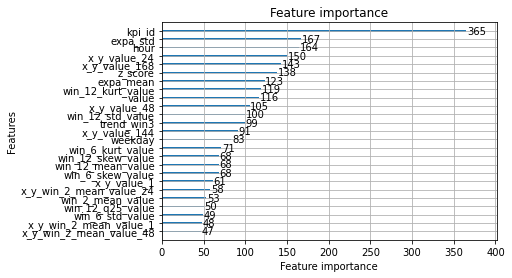

In [ ]:
lgb.plot_importance(clf, max_num_features=25)

XGBOOST